In [1]:
import numpy as np
from glob import glob
from PIL import Image
from numpy import array
import pandas as pd
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 

In [2]:
monreader_train = pd.read_csv('data_df.csv')

In [3]:
monreader_train.head(-2)

,Images,flip
0,training_flip_crop/0005_000000020.jpg,1
1,training_flip_crop/0038_000000009.jpg,1
2,training_flip_crop/0011_000000019.jpg,1
3,training_flip_crop/0062_000000023.jpg,1
4,training_flip_crop/0038_000000021.jpg,1
...,...,...
2385,training_notflip_crop/0049_000000009.jpg,0
2386,training_notflip_crop/0007_000000026.jpg,0
2387,training_notflip_crop/0049_000000021.jpg,0
2388,training_notflip_crop/0011_000000028.jpg,0


In [4]:
monreader_test = pd.read_csv('testdata_df.csv')
monreader_test

,Images,flip
0,testing_flip_crop/0005_000000008.jpg,1
1,testing_flip_crop/0063_000000011.jpg,1
2,testing_flip_crop/0004_000000006.jpg,1
3,testing_flip_crop/0012_000000008.jpg,1
4,testing_flip_crop/0061_000000026.jpg,1
...,...,...
592,testing_notflip_crop/0010_000000026.jpg,0
593,testing_notflip_crop/0039_000000022.jpg,0
594,testing_notflip_crop/0004_000000023.jpg,0
595,testing_notflip_crop/0005_000000005.jpg,0


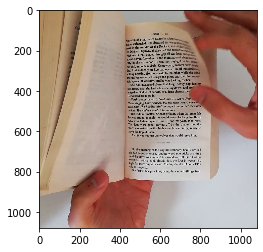

In [5]:
plt.imshow(cv2.cvtColor(cv2.imread(monreader_test['Images'][10]), cv2.COLOR_BGR2RGB))

In [6]:
(cv2.imread(monreader_test['Images'][10])).shape

(1080, 1080, 3)

In [7]:
import torch

In [8]:
batch_size = 4

In [47]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input channel 3; output channel 6, kernel 5*5
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) #
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        #x = x.view(4, 16 * 122 * 122)
        #x = x.view(-1, 16 * 122 * 122)
        #x = x.view(x.size(0), -1)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        #print(x.shape)
        return x


net = Net()

In [48]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.01)

In [11]:
monreader_train = monreader_train.reset_index()
monreader_test = monreader_test.reset_index()

In [12]:
#monreader_test

In [13]:
#monreader_train

In [14]:
#for i, data in enumerate(monreader_train.iterrows(), 0):
#    print(i, data[1][1])

In [15]:
def np2torch(dfcol):
    dfcol = cv2.cvtColor(cv2.imread(dfcol), cv2.COLOR_BGR2RGB)
    dfcol = cv2.resize(dfcol, (32,32), interpolation = cv2.INTER_AREA)
    dfcol = dfcol.astype('float32')/255
    dfcol = torch.from_numpy(dfcol)
    dfcol = dfcol.unsqueeze(0)
    dfcol = torch.reshape(dfcol, (1,3,32,32))
    return dfcol

In [16]:
monreader_trainsample = monreader_train

In [17]:
monreader_trainsample['Images'] = monreader_trainsample['Images'].apply(np2torch)

In [18]:
def np2torchint(labels):
    labels=np.array(labels)
    labels = torch.from_numpy(labels)
    labels = labels.unsqueeze(0)
    return labels

In [19]:
monreader_trainsample['flip'] = monreader_trainsample['flip'].apply(np2torchint)

In [20]:
#monreader_trainsample['flip']=monreader_trainsample['flip'].apply(np2torchint)

In [21]:
monreader_trainsample

,index,Images,flip
0,0,"[[[tensor([0.5412, 0.5255, 0.4824, 0.5294, 0.5...",[tensor(1)]
1,1,"[[[tensor([0.6667, 0.6706, 0.6627, 0.6627, 0.6...",[tensor(1)]
2,2,"[[[tensor([0.6706, 0.5725, 0.4118, 0.6706, 0.5...",[tensor(1)]
3,3,"[[[tensor([0.5490, 0.5373, 0.5020, 0.6039, 0.5...",[tensor(1)]
4,4,"[[[tensor([0.6588, 0.6667, 0.6588, 0.6549, 0.6...",[tensor(1)]
...,...,...,...
2387,2387,"[[[tensor([0.5373, 0.5294, 0.4863, 0.6431, 0.6...",[tensor(0)]
2388,2388,"[[[tensor([0.6275, 0.6039, 0.5647, 0.6314, 0.6...",[tensor(0)]
2389,2389,"[[[tensor([0.6392, 0.6196, 0.5765, 0.6275, 0.6...",[tensor(0)]
2390,2390,"[[[tensor([0.6549, 0.6627, 0.6588, 0.6471, 0.6...",[tensor(0)]


In [44]:
#from torch.utils.data import DataLoader
#trainloader = DataLoader(monreader_trainsample, batch_size=4)

In [66]:
'''train_losses = []
for epoch in range(20):
    running_loss = 0.0
    optimizer.zero_grad()
    for i, data in monreader_trainsample.iterrows():
        inputs = data['Images']
        labels = data['flip']
          # zero the parameter gradients
        #optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_loss=running_loss/len(monreader_trainsample)
        train_losses.append(loss)

        if i % 16 == 15:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 15:.3f}')
            running_loss = 0.0

print('Finished Training')'''
            
train_losses = []
import math

for epoch in range(20):
    running_loss = 0.0
    
    for i, data in monreader_trainsample.iterrows():
        inputs = data['Images']
        
        labels = data['flip']
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        #print(running_loss)
        if math.isnan(loss.item()):
            print(data['index'], labels)  
            
        train_loss=running_loss/len(monreader_trainsample)
        train_losses.append(train_loss)

        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
            
            correct = 0
            total = 0
            val_losses=[]
            # since we're not training, we don't need to calculate the gradients for our outputs
            #with torch.no_grad()
                
            for i, data in monreader_testsample.iterrows(): #use validation data here
                inputs = data['Images']
                labels = data['flip']
                # calculate outputs by running images through the network
                outputs = net(inputs)
                
                loss = criterion(outputs, labels)
               # loss.backward()
               # optimizer.step()
                running_loss += loss.item()
        
                # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                test_loss=running_loss/len(monreader_testsample)
                #print(running_loss)
                val_losses.append(test_loss)
            print(f'Accuracy of the network on the test images: {100 * correct // total} %')
            
            val_loss_avg = np.mean(val_losses)
            
            print(val_loss_avg)

print('Finished Training')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,   100] loss: 0.314
Accuracy of the network on the test images: 48 %
0.28959635205199613
[1,   200] loss: 5.252
Accuracy of the network on the test images: 48 %
0.28958571481512524
[1,   300] loss: 5.252
Accuracy of the network on the test images: 48 %
0.289578396003457
[1,   400] loss: 5.252
Accuracy of the network on the test images: 48 %
0.28957324472710755
[1,   500] loss: 5.253
Accuracy of the network on the test images: 48 %
0.2895692955604595
[1,   600] loss: 5.253
Accuracy of the network on the test images: 48 %
0.2895661809315863
[1,   700] loss: 5.253
Accuracy of the network on the test images: 48 %
0.2895637745213832
[1,   800] loss: 5.253
Accuracy of the network on the test images: 48 %
0.2895618078433772
[1,   900] loss: 5.253
Accuracy of the network on the test images: 48 %
0.289560154638167
[1,  1000] loss: 5.253
Accuracy of the network on the test images: 48 %
0.28955883496980156
[1,  1100] loss: 5.253
Accuracy of the network on the test images: 48 %
0.28955766433044

KeyboardInterrupt: 

In [23]:
#convert testdata images to tensors, run it through the network

In [24]:
monreader_testsample = monreader_test

In [25]:
monreader_testsample['Images'] = monreader_testsample['Images'].apply(np2torch)

In [26]:
monreader_testsample['flip'] = monreader_testsample['flip'].apply(np2torchint)

In [27]:
monreader_testsample

,index,Images,flip
0,0,"[[[tensor([0.5922, 0.5686, 0.5333, 0.5686, 0.5...",[tensor(1)]
1,1,"[[[tensor([0.5098, 0.4863, 0.4627, 0.6000, 0.5...",[tensor(1)]
2,2,"[[[tensor([0.5765, 0.5490, 0.4941, 0.5137, 0.4...",[tensor(1)]
3,3,"[[[tensor([0.6196, 0.6235, 0.6078, 0.6196, 0.6...",[tensor(1)]
4,4,"[[[tensor([0.5882, 0.5647, 0.5373, 0.5882, 0.5...",[tensor(1)]
...,...,...,...
592,592,"[[[tensor([0.5961, 0.5765, 0.5333, 0.6314, 0.6...",[tensor(0)]
593,593,"[[[tensor([0.6784, 0.6824, 0.6745, 0.6745, 0.6...",[tensor(0)]
594,594,"[[[tensor([0.6314, 0.6078, 0.5647, 0.6196, 0.6...",[tensor(0)]
595,595,"[[[tensor([0.6471, 0.6235, 0.5804, 0.6471, 0.6...",[tensor(0)]


In [58]:
correct = 0
total = 0
val_losses=[]
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for i, data in monreader_testsample.iterrows():
        inputs = data['Images']
        labels = data['flip']
        # calculate outputs by running images through the network
        outputs = net(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_loss=running_loss/len(monreader_testsample)
        print(running_loss)
        val_losses.append(test_loss)
print(f'Accuracy of the network on the test images: {100 * correct // total} %')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423545837
28.838005423

28.838005423545837
28.838005423545837
28.838005423545837
Accuracy of the network on the test images: 51 %


In [61]:
print(len(val_losses))

597


In [62]:
print(len(train_losses))

11967


In [51]:
classes = ('flip', 'notflip')
correct_pred = {classname: 0 for classname in classes} #{'flip': 0, 'notflip': 0}
total_pred = {classname: 0 for classname in classes} #{'flip': 0, 'notflip': 0}

# again no gradients needed
with torch.no_grad():
    for i, data in monreader_testsample.iterrows():
        inputs = data['Images']
        labels = data['flip']
        outputs = net(inputs)
#        print(torch.max(outputs, 1))
        _, predictions = torch.max(outputs, 1)
#        print(predictions)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy for class: flip  is 100.0 %
Accuracy for class: notflip is 0.0 %


In [52]:
correct_pred

{'flip': 307, 'notflip': 0}

In [53]:
total_pred

{'flip': 307, 'notflip': 290}

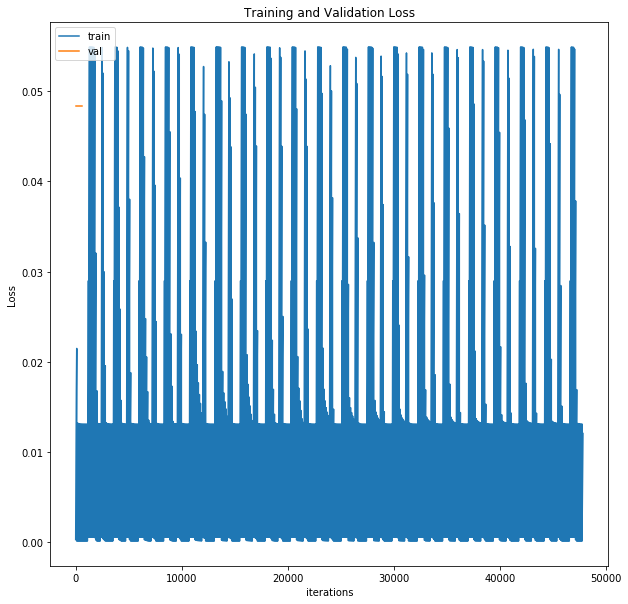

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Training and Validation Loss")
plt.plot(train_losses,label="train")
plt.plot(val_losses,label="val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

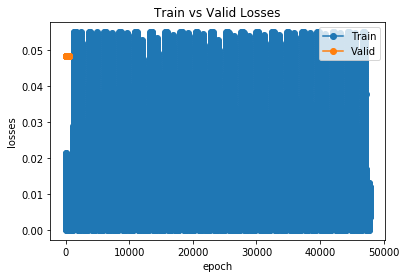

In [55]:
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')

plt.show()

#### Different optimizer - SGD, Adam
#### Different learning rates - 
#### Different dropout probabilities - ?
#### More epochs - should not overfit, error b/m training and validation will increase
#### Implement early stopping as a next step - checked at the end of each epoch, which metric is monitored here? accuracy, loss? - validation loss, condition like patience
#### Plot train and validation loss on a chart - To do

#### Imbalance - data augmentation (rotate images, masking portion of the image)